# Tugas klasifikasi
## Rahmat Sunjani [ 55201120030 ]
## Putri Avrilya [ 55201120030 ]

In [15]:
import pandas as pd
# url = 'https://bit.ly/3tZGkAR'
url = '../kaggle-survey-2022/kaggle_survey_2022_responses.csv'
df = pd.read_csv(url)
df = df.rename(columns= {'Duration (in seconds)':'Q1'})

C:\Users\user\AppData\Local\Temp\ipykernel_8668\3601072372.py:4: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [16]:
## change to view all collum use
df = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_7', 'Q6_8', 'Q11', 'Q12_4', 'Q13_5', 'Q23', 'Q24', 'Q31_1', 'Q44_1']]

In [17]:
## change name to view all collum use
df = df.rename(columns={'Q1':'duration', 'Q2':'age', 'Q3':'gender', 'Q4':'country', 'Q5':'educational_status','Q6_1':'coursera', 'Q6_2':'edX', 'Q6_3':'kaggle', 'Q6_4':'datacamp', 'Q6_7':'udemy', 'Q6_8':'linkedIn', 'Q11':'writing_code_year', 'Q12_4':'programming_languages', 'Q13_5':'IDE', 'Q23':'current_role', 'Q24':'current_industry', 'Q31_1':'cloud_computing', 'Q44_1':'favorite_media_sources'})[1:]

In [18]:
courses = df[['coursera', 'edX', 'kaggle', 'datacamp', 'udemy', 'linkedIn']]
print(courses)#.columns.tolist()

       coursera  edX                kaggle  datacamp  udemy           linkedIn
1           NaN  NaN                   NaN       NaN    NaN                NaN
2           NaN  NaN                   NaN       NaN    NaN                NaN
3      Coursera  edX                   NaN  DataCamp  Udemy  LinkedIn Learning
4      Coursera  NaN  Kaggle Learn Courses       NaN  Udemy                NaN
5           NaN  NaN                   NaN       NaN    NaN                NaN
...         ...  ...                   ...       ...    ...                ...
23993       NaN  NaN                   NaN       NaN    NaN                NaN
23994       NaN  NaN                   NaN       NaN    NaN                NaN
23995       NaN  NaN                   NaN  DataCamp  Udemy                NaN
23996       NaN  NaN  Kaggle Learn Courses       NaN    NaN                NaN
23997       NaN  NaN                   NaN       NaN    NaN                NaN

[23997 rows x 6 columns]


In [19]:
# cek data null atau kosong ( namun data lain bisa digunakan )
df.isna().sum()

duration                      0
age                           0
gender                        0
country                       0
educational_status            0
coursera                  14298
edX                       21523
kaggle                    17369
datacamp                  20279
udemy                     17881
linkedIn                  21231
writing_code_year           754
programming_languages     20196
IDE                       17898
current_role              13367
current_industry          14903
cloud_computing           21651
favorite_media_sources    20002
dtype: int64

In [20]:
# Cek Data Type
df.dtypes

duration                  object
age                       object
gender                    object
country                   object
educational_status        object
coursera                  object
edX                       object
kaggle                    object
datacamp                  object
udemy                     object
linkedIn                  object
writing_code_year         object
programming_languages     object
IDE                       object
current_role              object
current_industry          object
cloud_computing           object
favorite_media_sources    object
dtype: object

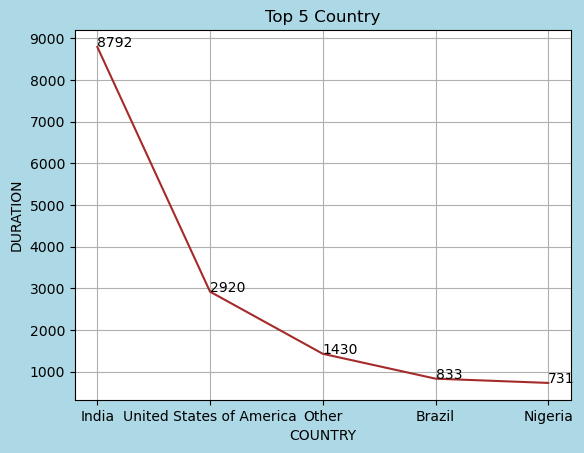



=== Top 5 Negara Pengunjung Terbanyak ===

India                       8792
United States of America    2920
Other                       1430
Brazil                       833
Nigeria                      731
Name: country, dtype: int64


===== INSIGHT =====




In [21]:
## 1. Menampilkan data berdasarkan Negara terbanyak pengunjung survey.
soal_1 = df[['age', 'gender', 'educational_status', 'country', 'duration']]

# CARI DATA COUNTRY
country_10 = soal_1['country'].value_counts()[:5]

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.patch.set_facecolor('lightblue')  # type: ignore
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
x = country_10.index.tolist()
y = country_10.tolist()
plt.xlabel('COUNTRY')
plt.ylabel('DURATION')
plt.title('Top 5 Country')
plt.grid(True)
plt.plot(x, y,color='brown')
addlabels(x, y)
plt.show()

print(f'\n\n=== Top 5 Negara Pengunjung Terbanyak ===\n\n{country_10}')
print(f'\n\n===== INSIGHT =====\n\n')
